# **Classificação Fumante: Regressão Logística**

Como foi visto nos anteriores caso (**KNN**, **RLinear** ou **Árvore de Decisãao**) o fato de ser fumante ou não afeta muito o valor dos custos médicos quando falamos de seguro médico, portanto é possível de que a passoa omita o fato de ser fumante ou não. Esta omissão pode ser considerada como fraude e traz um grande perjuizo nas empresas que brindam planos de saúde.  

Em principio não teríamos a necesidade de prever a variável fumante (definida por Sim =1  e Não = 0). Assume-se que esta é uma variável cadastral, mas por se uma variável muito importante no cálculo dos custos médicos do plano de saúde é muito importante examinar a veracidade das informações dos dados cadastrais. Isto é, a idea não é predecir se a pessoa é fumante ou não, a ideia fundamental é verificar as informações fornecidas (ser fumante) para evitar perjuizo.

Com base nesta necesidade, a ideia neste problema é determinar se um novo elemento corresponde ou não a alguma das categorias (0, 1) de uma determinada variável (Fumante).

Para nosso caso ilustrativo vamos determinar (classificar) se elementos correspondem a uma determinada característica (variável fumante) usando como informação os dados de custos médicos. 

---

###**Probabilidade de Pedrição**

Caso mais simples: assumindo que temos duas clases mais o menos separadas (Fumante = 1 ou não = 0, por exemplo),  onde a fase (separação) é definida por uma função linear ($f(x)$ linear em média). Para determinar se um elemento corresponde a uma u outra classe precisamos determinar a probabilidade de pertencer ou não a uma classe definida por uma função que cumple a condição:

* Se $h_{\theta}(x) \geq 0.5$ $\rightarrow$ $y=1$ ........ Fumante 
* Se $h_{\theta}(x) < 0.5$ $\rightarrow$ $y=0$ .........Não Fumante

Então a forma de determinar um elemento pertence a uma categoria será definida pela probabilidade ($0 \leq P \leq 1$)  definida pela expressão: 

$$ P(Y=1|X=x)=h_{\theta}(x) = g(z) = \frac{1}{1+ exp^{-z}}$$   

Esta função tem uma forma muito parecida a uma função chamada como função degrau, com a diferença que esta função (Sigmoide) é uma função continua. 

**Função Sigmoide**


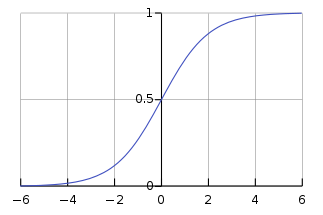
                      z

* Se $z=0$ temos uma probabilidade $P = 0.5$  
* Para valores positivos de $z$ temos uma proabilidade $P > 0.5$ portanto o elemento corresponde à classe
*  Para valores negativos de $z$ temos uma proabilidade $P < 0.5$ portanto o elemento não corresponde à classe

# Importação dos Dados:

Os dados podem ser obtido do site do Kaggle.com. Podemos fazer um download e depois abrir ou também importar diretamente usando um link onde esta o arquivo. Esses dados serão guardados na variável **dados** do tipo _dataframe_.

In [ ]:
# importação via github 
import pandas as pd
url = 'https://raw.githubusercontent.com/gitflai/DDS4/main/insurance.csv'
dados = pd.read_csv(url)

# mise un place
dados['smoker'] = dados['smoker'].map({'yes': 1, 'no': 0})
dados['charges'] = dados['charges']/1000 
dados = dados[['bmi', 'smoker', 'charges']]
dados.head()

# separação de variáveis preditoras e variával resposta
X = dados[['bmi', 'charges']]
y = dados['smoker'] 

# Informações dos dados e Mise en place:

Obter informações gerais dos dados como número de variáveis, tipo, etc. Os comandos podem ser visualizados e entendidos melhor nos anteriores scripts (Custos_Medicos.ipynb, etc)

Lembrar o que foi feito nos modelos anteriores:

* Transformar a variável **Fumante** em 0 (não) ou 1 (sim)
* Colocar a variável resposta na escala para cada mil dolares.

Nesta análise também vamos considerar só as variáveis:
* var. dependiente: **Fumante**
* var. independientes: índice de massa corporal (**IMC**) e o **custo**

## Upgrade na Técnica de Validação: _K-FOLD_

Esta técnica de validação separamos os dados em K parte  

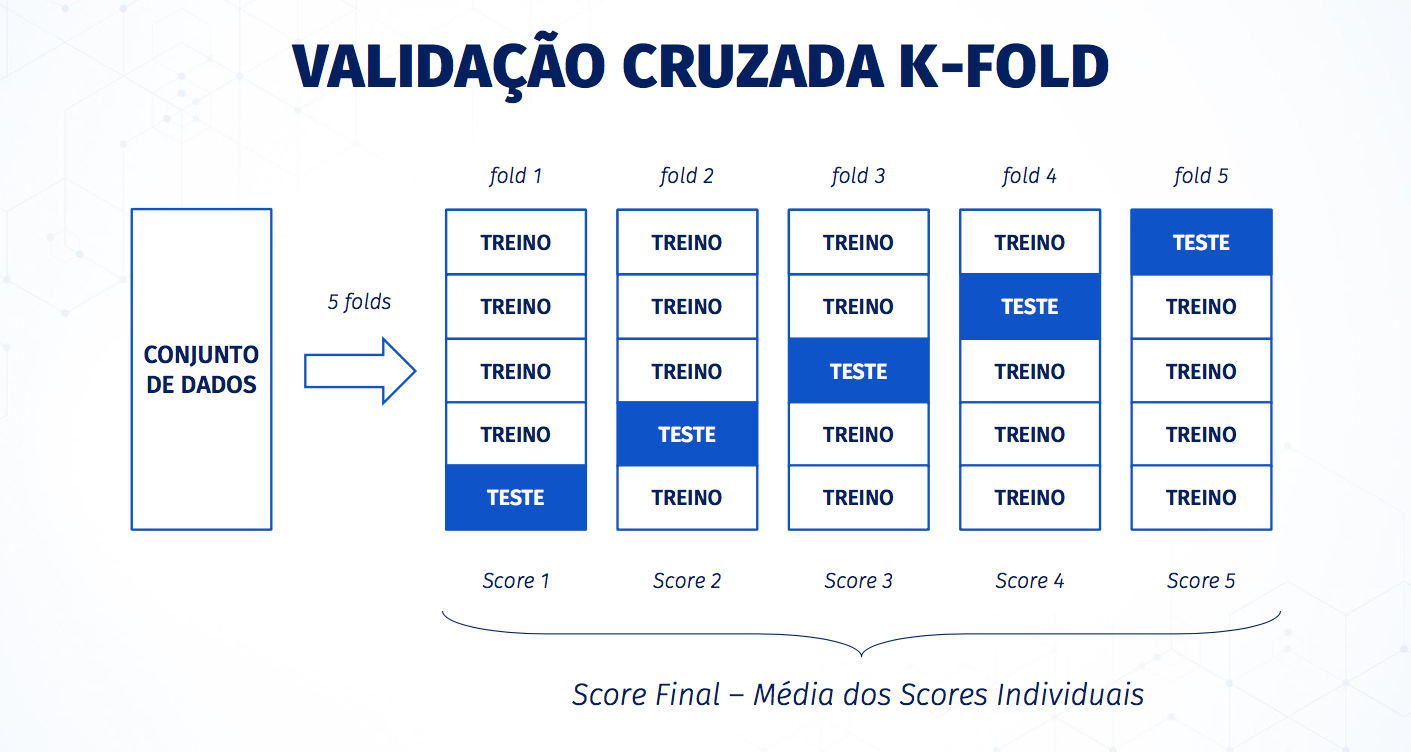



Neste método de validação todos os elementos do conjunto de dados vão para teste pelo menos uma vez. No gráfico acima temos um K=5 então o conjunto de dados é dividido em 5 parte e feito 5 vezes, e o score final é calculado da média destes grupos individuais.

Para a validação chamamos a biblioteca _sklearn.model_selection_ 

aplicando as funções:
   * _KFold_ ~> define os parametros de validação
   * _cross_validate_ -> a função que faz a validação cruzada e calcula a métrica.

_n_splits: definição das partes

_suffle_ : (embaralhar) indica que cada vez que rodar ela va a gerar uma novas distribuição.

In [ ]:
# Configuração da Validação Cruzada

from sklearn.model_selection import cross_validate
from sklearn.model_selection import KFold

validacao = KFold(n_splits = 10, shuffle = True)

---
---

## Regressão Logística

Primeiro temos que importar a biblioteca -> _sklearn.linear_model_

onde será usada a função -> _LogisticRegression_

_cross_validate_ -> a função que faz a validação cruzada e calcula a métrica (modelo, conjunto de dados, tipo de validação, a métrica en função de ... )

Dando como resultado um dicionario:

   * Fit_time: tempo que levou para ajustar cada modelo
   * score_time: tempo que levou para verificar a métrica
   * test_score: a métrica de cada parte (acurácia 1, acurácia 2, ...)

In [ ]:
from sklearn.linear_model import LogisticRegression 

modelo = LogisticRegression() 
reglog = cross_validate(modelo, X, y, cv = validacao, scoring = 'accuracy')   
reglog

{'fit_time': array([0.016994  , 0.01045227, 0.01055717, 0.01080084, 0.0106864 ,
        0.00995541, 0.01019073, 0.01028514, 0.01004529, 0.01005793]),
 'score_time': array([0.00182581, 0.0017283 , 0.00170064, 0.00169897, 0.00174785,
        0.00165415, 0.0018003 , 0.00166965, 0.00169706, 0.00167465]),
 'test_score': array([0.91044776, 0.92537313, 0.92537313, 0.92537313, 0.92537313,
        0.95522388, 0.93283582, 0.94776119, 0.93984962, 0.93984962])}

In [ ]:
reglog['test_score']

array([0.91044776, 0.92537313, 0.92537313, 0.92537313, 0.92537313,
       0.95522388, 0.93283582, 0.94776119, 0.93984962, 0.93984962])

Calculamos a média dos resultados da acurácias: dando como média 0.93 

In [ ]:
reglog['test_score'].mean()

0.9327460442150152

Lembrar que por definição temos:

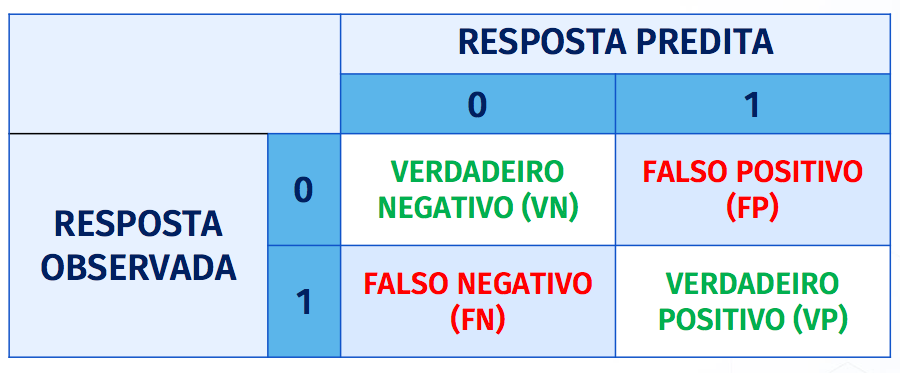

$Acur\acute{a}cia = \frac{VN + VP}{VN + VP +FN + FP}  \:\:\:\:\:\:\:\:\:\:\:\:  Sensibilidade = \frac{VP}{VN + VP} \:\:\:\:\:\:\:\:\:\:\:\:  Precis\tilde{a}o = \frac{VP}{VP + FP} $

In [ ]:
reglog = cross_validate(modelo, X, y, cv = validacao, scoring = ['accuracy', 'recall', 'precision'])   

print('     Acurácia:', round(reglog['test_accuracy'].mean(), 4))
print('Sensibilidade:', round(reglog['test_recall'].mean(), 4))
print('     Precisão:', round(reglog['test_precision'].mean(), 4))

     Acurácia: 0.9313
Sensibilidade: 0.8053
     Precisão: 0.8494


Gráficamos a região de clasificação: Para isto usamos uma separação simple de treino e teste, só de forma ilustrativa. 

/usr/local/lib/python3.7/dist-packages/sklearn/base.py:451: UserWarning: X does not have valid feature names, but LogisticRegression was fitted with feature names
  "X does not have valid feature names, but"
/usr/local/lib/python3.7/dist-packages/mlxtend/plotting/decision_regions.py:244: MatplotlibDeprecationWarning: Passing unsupported keyword arguments to axis() will raise a TypeError in 3.3.
  ax.axis(xmin=xx.min(), xmax=xx.max(), y_min=yy.min(), y_max=yy.max())
/usr/local/lib/python3.7/dist-packages/sklearn/base.py:451: UserWarning: X does not have valid feature names, but LogisticRegression was fitted with feature names
  "X does not have valid feature names, but"
/usr/local/lib/python3.7/dist-packages/mlxtend/plotting/decision_regions.py:244: MatplotlibDeprecationWarning: Passing unsupported keyword arguments to axis() will raise a TypeError in 3.3.
  ax.axis(xmin=xx.min(), xmax=xx.max(), y_min=yy.min(), y_max=yy.max())


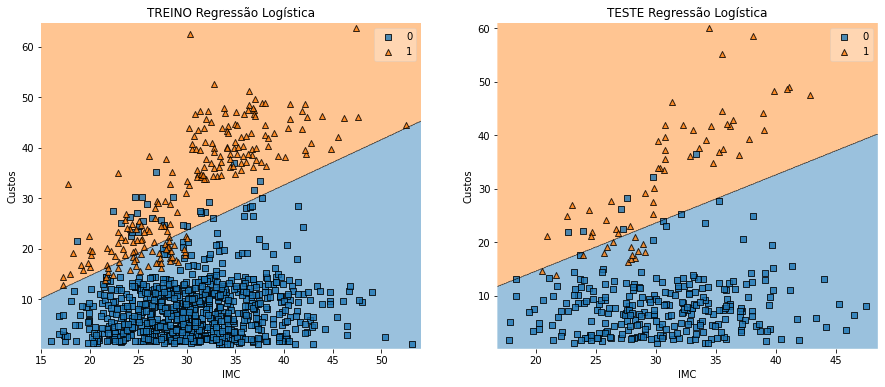

In [ ]:
# Região de Decisão

from sklearn.model_selection import train_test_split 
from mlxtend.plotting import plot_decision_regions
import matplotlib.pyplot as plt
 
Xtreino, Xteste, ytreino, yteste  = train_test_split(X, y, test_size = 0.25)
modelo.fit(Xtreino, ytreino)

plt.figure(figsize = (15, 6))

plt.subplot(1, 2, 1)
plot_decision_regions(Xtreino.values, ytreino.values, clf = modelo, legend = 1)
plt.xlabel('IMC')
plt.ylabel('Custos')
plt.title('TREINO Regressão Logística')  

plt.subplot(1, 2, 2)
plot_decision_regions(Xteste.values, yteste.values, clf = modelo, legend = 1)
plt.xlabel('IMC')
plt.ylabel('Custos')
plt.title('TESTE Regressão Logística')   

plt.show()

---
---

## Conclusão

Nesta análise usando o modelo de **Regressão Logística** obtivemos uma acurácia de 93% o que significa que para cada cem dados erramos so em 7 casos.

No caso do gráfico o resultado obtido é parecido ao caso da **Regressão Linear** com uma variável, já que a ideia é a mesma (um ajuste linear) Para melhores resultados poderiamos tenta funções de grau maior. 

Para próximas análises serão incluido outras variáveis e espera-se diminuir o valor do **acurácia** seja melhor.

---